Description

Analysis of ‘Housing Dataset’ provided by Analyst-2 (analyst-2.ai), based on source dataset retrieved from https://www.kaggle.com/peterkmutua/housing-dataset on 21 November 2021.

--- Dataset description provided by original source is as follows ---

Context
There's a story behind every dataset and here's your opportunity to share yours.

ACTIVITIES

Follow the process below to develop a model that can be used by real estate companies and real estate agents to predict the price of a house.

Business Understanding -Conduct a literature review to understand the factors that determine the price of houses globally and locally. -Based on the dataset provided, formulate a business question to be answered through the analysis.

Data Understanding -The data in the dataset provided was collected through webs scrapping. Conduct further reading to understand the process of web scrapping, how it is conducted (methods and tools) and any ethical challenges related to it.

Data Preparation -Conduct a detailed exploratory analysis on the dataset. -Prepare the dataset for modeling -Identify the technique relevant for answering the business question stated above. -Ensure that the dataset meets all the assumptions of the technique identified. -Conduct preliminary feature selection by identifying the set of features that are likely to provide a model with good performance.

Modeling -Split the dataset into two; training set and validation set. With justifications, decide on the ratio of the training set to the validation set. -Generate the required model

Evaluation -Interpret the model in terms of its goodness of fit in predicting the price of houses. -Assume that the model is not good enough and then conduct further feature engineering or use any other model tuning strategies at your disposal to generate additional two instances of the model. -Settle on the best model instance and then re-interpret.

Implementation -Think of how the model can be implemented and used by real estate firms and agents. -Identify possible challenges of applying the model. -Recommendations on how the model can be improved in future

--- Original source retains full ownership of the source dataset ---

In [1]:
#Load the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kurtosis, skew
from scipy.stats import zscore


In [2]:
#Load and read the Dataset

housing = pd.read_csv('melbourne_housing.csv')
housing

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,...,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,...,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,...,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016,...,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
#This function checks for categorical columns in a Pandas DataFrame and prints them.

def print_categorical_columns(dataframe):

    # Identify categorical columns
    categorical_columns = dataframe.select_dtypes(include=['category', 'object']).columns.tolist()

    # Print categorical columns
    if len(categorical_columns) > 0:
        print('Categorical columns:')
        for column in categorical_columns:
            print(column)
    else:
        print('No categorical columns found.')

print_categorical_columns(housing)


Categorical columns:
Suburb
Address
Type
Method
SellerG
Date
CouncilArea
Regionname


In [11]:
columns = ['Suburb' , 'Address' , 'Type' , 'Method' , 'SellerG' , 'Date' , 'CouncilArea' , 'Regionname']

def convert_to_codes(df, columns):
    for col in columns:
        # Convert the column to categorical data type
        df[col] = df[col].astype('category')
        
        # Create a new column with categorical codes and insert it next to the original column
        df.insert(df.columns.get_loc(col)+1, col+'_code', df[col].cat.codes)

convert_to_codes(housing, columns)

In [14]:
housing

,Suburb,Suburb_code,Address,Address_code,Rooms,Type,Type_code,Price,Method,Method_code,...,Landsize,BuildingArea,YearBuilt,CouncilArea,CouncilArea_code,Lattitude,Longtitude,Regionname,Regionname_code,Propertycount
0,Abbotsford,0,85 Turner St,12794,2,h,0,1480000,S,1,...,202,NaN,NaN,Yarra,31,-37.79960,144.99840,Northern Metropolitan,2,4019
1,Abbotsford,0,25 Bloomburg St,5943,2,h,0,1035000,S,1,...,156,79.0,1900.0,Yarra,31,-37.80790,144.99340,Northern Metropolitan,2,4019
2,Abbotsford,0,5 Charles St,9814,3,h,0,1465000,SP,3,...,134,150.0,1900.0,Yarra,31,-37.80930,144.99440,Northern Metropolitan,2,4019
3,Abbotsford,0,40 Federation La,9004,3,h,0,850000,PI,0,...,94,NaN,NaN,Yarra,31,-37.79690,144.99690,Northern Metropolitan,2,4019
4,Abbotsford,0,55a Park St,10589,4,h,0,1600000,VB,4,...,120,142.0,2014.0,Yarra,31,-37.80720,144.99410,Northern Metropolitan,2,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,302,12 Strada Cr,1991,4,h,0,1245000,S,1,...,652,NaN,1981.0,NaN,-1,-37.90562,145.16761,South-Eastern Metropolitan,4,7392
13576,Williamstown,305,77 Merrett Dr,12234,3,h,0,1031000,SP,3,...,333,133.0,1995.0,NaN,-1,-37.85927,144.87904,Western Metropolitan,6,6380
13577,Williamstown,305,83 Power St,12745,3,h,0,1170000,S,1,...,436,NaN,1997.0,NaN,-1,-37.85274,144.88738,Western Metropolitan,6,6380
13578,Williamstown,305,96 Verdon St,13311,4,h,0,2500000,PI,0,...,866,157.0,1920.0,NaN,-1,-37.85908,144.89299,Western Metropolitan,6,6380


In [15]:
#sum of unique values in the columns

def print_unique_counts(df):
    for col in df.columns:
        unique_count = len(df[col].unique())
        print(f"{col}: {unique_count}")


print_unique_counts(housing)

Suburb: 314
Suburb_code: 314
Address: 13378
Address_code: 13378
Rooms: 9
Type: 3
Type_code: 3
Price: 2204
Method: 5
Method_code: 5
SellerG: 268
SellerG_code: 268
Date: 58
Date_code: 58
Distance: 202
Postcode: 198
Bedroom2: 12
Bathroom: 9
Car: 12
Landsize: 1448
BuildingArea: 603
YearBuilt: 145
CouncilArea: 34
CouncilArea_code: 34
Lattitude: 6503
Longtitude: 7063
Regionname: 8
Regionname_code: 8
Propertycount: 311


In [19]:
#This function checks for missing values and returns missing value counts and percentages

def check_missing_values(dataframe):

    # Count missing values
    missing_counts = dataframe.isna().sum()

    # Calculate missing value percentages
    missing_percentages = (missing_counts / len(dataframe)) * 100

    # Create a new DataFrame with missing value counts and percentages
    missing_data = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percentages})

    # Sort by missing value count in descending order
    missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

    return missing_data

check_missing_values(housing)

,Missing Count,Missing Percentage
BuildingArea,6450,47.496318
YearBuilt,5375,39.580265
CouncilArea,1369,10.081001
Car,62,0.456554


In [20]:
housing.shape

(13580, 29)

In [21]:
#Calculates the sum of rows that have more than 2 missing values.

def sum_rows_with_missing_values(df, max_missing=2):

    # count the number of missing values in each row
    missing_counts = df.isnull().sum(axis=1)
    
    # count the number of rows with more than max_missing missing values
    rows_with_missing = (missing_counts > max_missing).sum()
    
    return rows_with_missing

sum_rows_with_missing_values(housing, max_missing=2)

594

In [22]:
#Drops rows that have more than 2 missing values.

def drop_rows_with_missing_values(df, max_missing=2):

    return df.dropna(thresh=df.shape[1]-max_missing, inplace=True)

drop_rows_with_missing_values(housing, max_missing=2)

In [23]:
housing

,Suburb,Suburb_code,Address,Address_code,Rooms,Type,Type_code,Price,Method,Method_code,...,Landsize,BuildingArea,YearBuilt,CouncilArea,CouncilArea_code,Lattitude,Longtitude,Regionname,Regionname_code,Propertycount
0,Abbotsford,0,85 Turner St,12794,2,h,0,1480000,S,1,...,202,NaN,NaN,Yarra,31,-37.79960,144.99840,Northern Metropolitan,2,4019
1,Abbotsford,0,25 Bloomburg St,5943,2,h,0,1035000,S,1,...,156,79.0,1900.0,Yarra,31,-37.80790,144.99340,Northern Metropolitan,2,4019
2,Abbotsford,0,5 Charles St,9814,3,h,0,1465000,SP,3,...,134,150.0,1900.0,Yarra,31,-37.80930,144.99440,Northern Metropolitan,2,4019
3,Abbotsford,0,40 Federation La,9004,3,h,0,850000,PI,0,...,94,NaN,NaN,Yarra,31,-37.79690,144.99690,Northern Metropolitan,2,4019
4,Abbotsford,0,55a Park St,10589,4,h,0,1600000,VB,4,...,120,142.0,2014.0,Yarra,31,-37.80720,144.99410,Northern Metropolitan,2,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,302,12 Strada Cr,1991,4,h,0,1245000,S,1,...,652,NaN,1981.0,NaN,-1,-37.90562,145.16761,South-Eastern Metropolitan,4,7392
13576,Williamstown,305,77 Merrett Dr,12234,3,h,0,1031000,SP,3,...,333,133.0,1995.0,NaN,-1,-37.85927,144.87904,Western Metropolitan,6,6380
13577,Williamstown,305,83 Power St,12745,3,h,0,1170000,S,1,...,436,NaN,1997.0,NaN,-1,-37.85274,144.88738,Western Metropolitan,6,6380
13578,Williamstown,305,96 Verdon St,13311,4,h,0,2500000,PI,0,...,866,157.0,1920.0,NaN,-1,-37.85908,144.89299,Western Metropolitan,6,6380


In [24]:
check_missing_values(housing)

,Missing Count,Missing Percentage
BuildingArea,5857,45.102418
YearBuilt,4784,36.839673
CouncilArea,775,5.967966
Car,28,0.215617


In [25]:
# calculate the median, mean and mode of the columns
# impute the missing values 

median_year = housing['YearBuilt'].median()
housing['YearBuilt'].fillna(median_year, inplace=True)

mean_car = housing['Car'].mean()
housing['Car'].fillna(mean_car, inplace=True)

building_area = housing['BuildingArea'].median()
housing['BuildingArea'].fillna(building_area , inplace=True)

council_area_mode = housing['CouncilArea'].mode()[0]
housing['CouncilArea'].fillna(council_area_mode, inplace=True)


In [26]:
housing

,Suburb,Suburb_code,Address,Address_code,Rooms,Type,Type_code,Price,Method,Method_code,...,Landsize,BuildingArea,YearBuilt,CouncilArea,CouncilArea_code,Lattitude,Longtitude,Regionname,Regionname_code,Propertycount
0,Abbotsford,0,85 Turner St,12794,2,h,0,1480000,S,1,...,202,126.0,1970.0,Yarra,31,-37.79960,144.99840,Northern Metropolitan,2,4019
1,Abbotsford,0,25 Bloomburg St,5943,2,h,0,1035000,S,1,...,156,79.0,1900.0,Yarra,31,-37.80790,144.99340,Northern Metropolitan,2,4019
2,Abbotsford,0,5 Charles St,9814,3,h,0,1465000,SP,3,...,134,150.0,1900.0,Yarra,31,-37.80930,144.99440,Northern Metropolitan,2,4019
3,Abbotsford,0,40 Federation La,9004,3,h,0,850000,PI,0,...,94,126.0,1970.0,Yarra,31,-37.79690,144.99690,Northern Metropolitan,2,4019
4,Abbotsford,0,55a Park St,10589,4,h,0,1600000,VB,4,...,120,142.0,2014.0,Yarra,31,-37.80720,144.99410,Northern Metropolitan,2,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,302,12 Strada Cr,1991,4,h,0,1245000,S,1,...,652,126.0,1981.0,Moreland,-1,-37.90562,145.16761,South-Eastern Metropolitan,4,7392
13576,Williamstown,305,77 Merrett Dr,12234,3,h,0,1031000,SP,3,...,333,133.0,1995.0,Moreland,-1,-37.85927,144.87904,Western Metropolitan,6,6380
13577,Williamstown,305,83 Power St,12745,3,h,0,1170000,S,1,...,436,126.0,1997.0,Moreland,-1,-37.85274,144.88738,Western Metropolitan,6,6380
13578,Williamstown,305,96 Verdon St,13311,4,h,0,2500000,PI,0,...,866,157.0,1920.0,Moreland,-1,-37.85908,144.89299,Western Metropolitan,6,6380


In [27]:
#Confirm there are no missing values
check_missing_values(housing)

,Missing Count,Missing Percentage


In [28]:
#check for duplicates
#This function counts the number of duplicate rows.

def count_duplicate_rows(df):

    num_duplicates = df.duplicated().sum()
    return num_duplicates

count_duplicate_rows(housing)

0

In [29]:
#Checks for outliers in each numerical column of a pandas DataFrame using z-score and prints the sum of outliers in each column.
#Outliers are defined as values that are more than 3 standard deviations away from the mean.

def print_outlier_sum_zscore(df):

    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        z_scores = zscore(df[col])
        num_outliers = (abs(z_scores) > 3).sum()
        print(f"{col}: {num_outliers} outliers")

print_outlier_sum_zscore(housing)

Rooms: 82 outliers
Price: 223 outliers
Distance: 224 outliers
Postcode: 144 outliers
Bedroom2: 79 outliers
Bathroom: 137 outliers
Car: 124 outliers
Landsize: 24 outliers
BuildingArea: 5 outliers
YearBuilt: 23 outliers
Lattitude: 146 outliers
Longtitude: 176 outliers
Propertycount: 339 outliers


* There are several ways to handle outliers in a dataset, depending on the specific circumstances and the goals of the analysis:

* `Keep the outliers: Sometimes`, outliers may be genuine observations that provide valuable insights into the data. In such cases, it may be appropriate to keep the outliers in the dataset and analyze them separately or with specific methods.

* `Remove the outliers:` If the outliers are caused by measurement or data entry errors, it may be appropriate to remove them from the dataset to avoid skewing the analysis. However, removing too many outliers can also lead to loss of information and bias in the analysis.

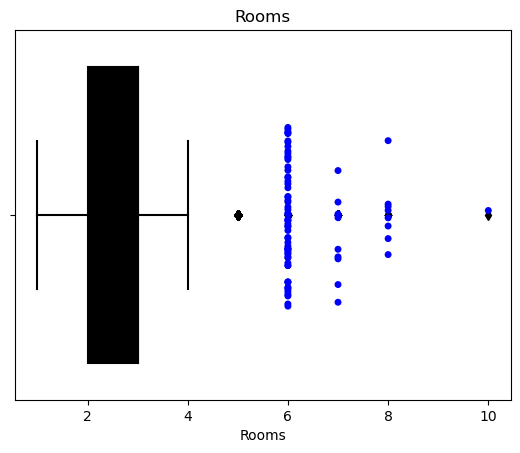

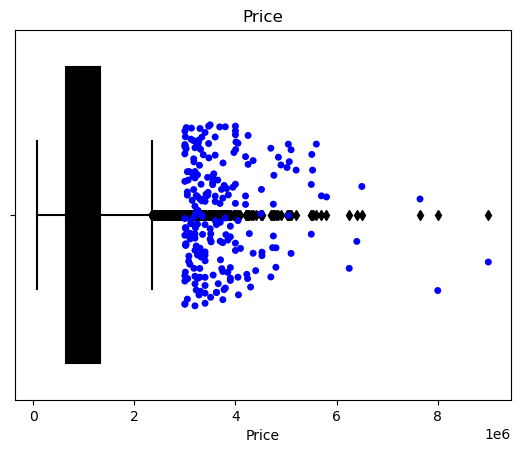

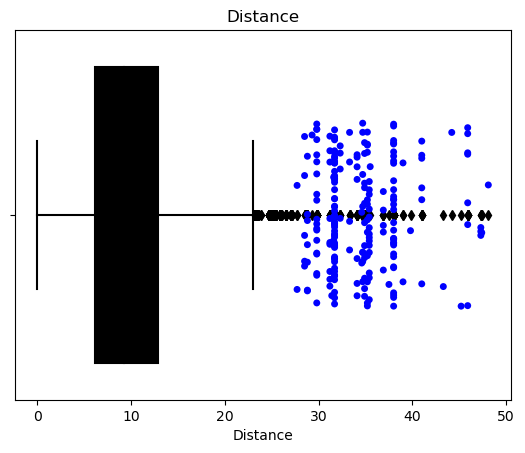

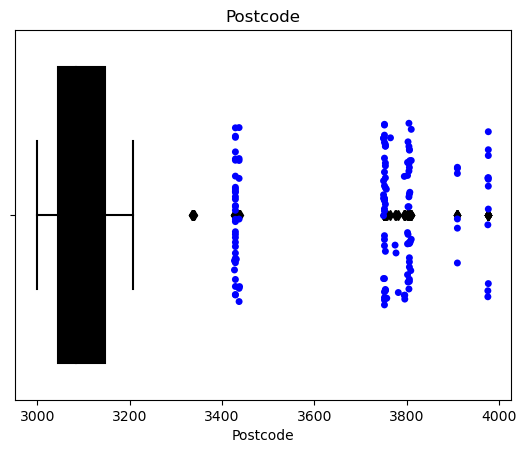

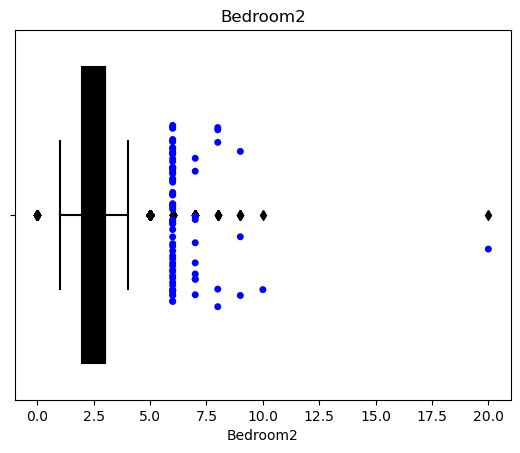

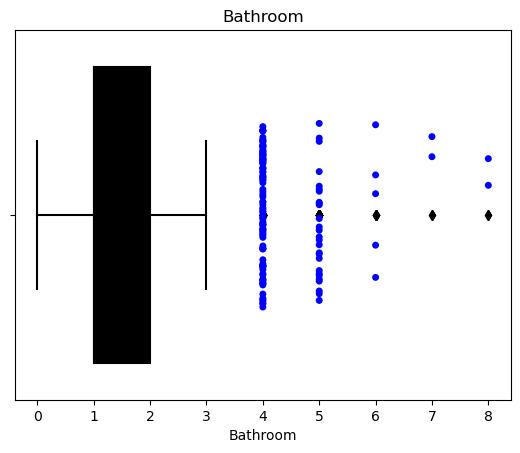

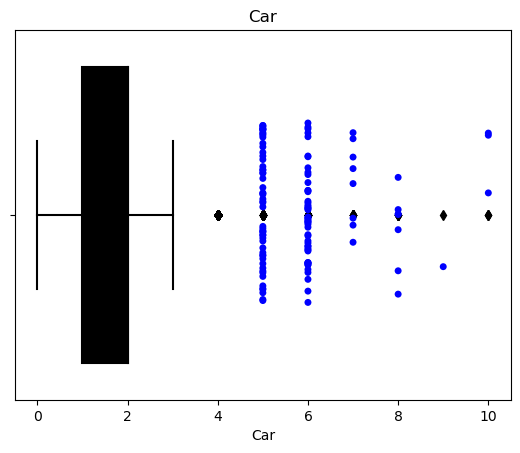

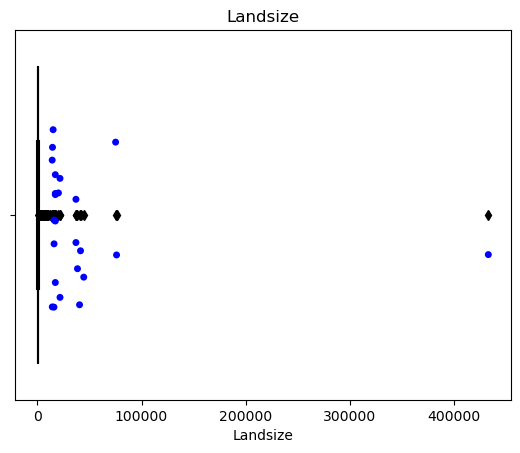

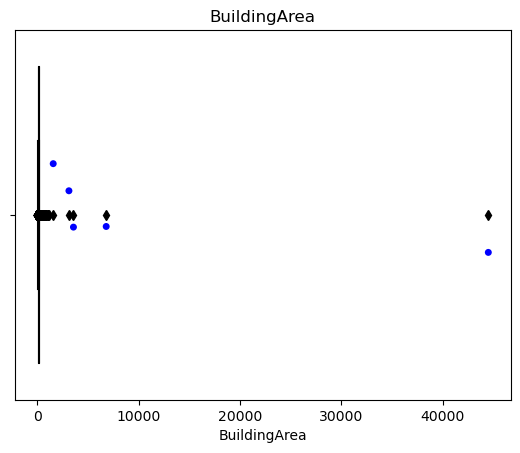

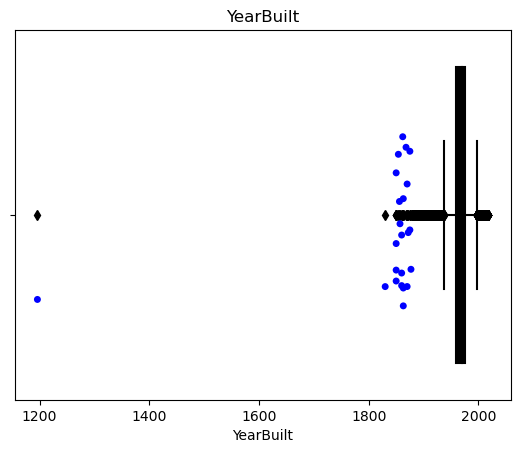

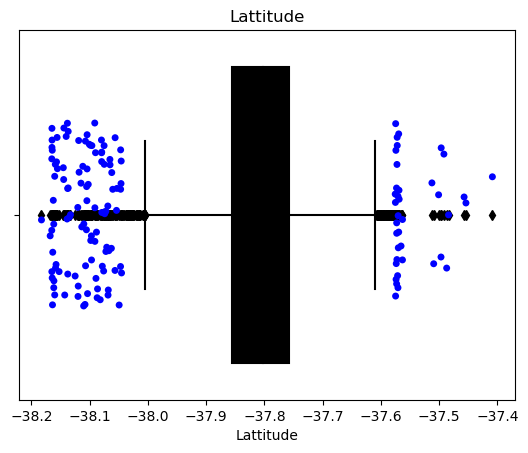

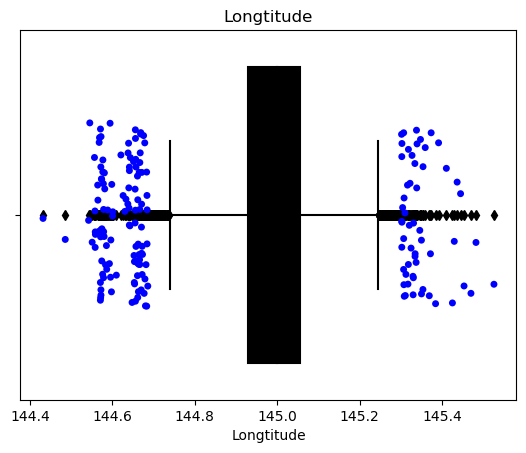

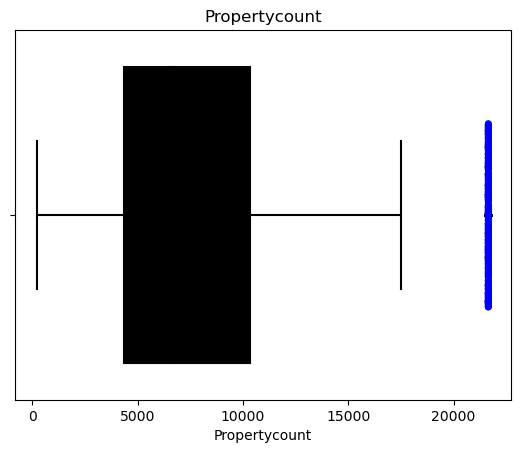

In [32]:
# Select numerical columns
num_cols = housing.select_dtypes(include=['float64', 'int64'])

# Calculate z-scores for each numerical column
z_scores = num_cols.apply(zscore)

# Identify outliers
outliers = (z_scores > 3) | (z_scores < -3)

# Create boxplots for each numerical column and highlight outliers
for col in num_cols.columns:
    plt.figure()
    sns.boxplot(x=housing[col], color='black')
    sns.stripplot(x=housing[col][outliers[col]], color='blue', jitter=0.25)
    plt.title(col)
    plt.show()


## SUMMARY
There are no duplicates in this dataset!

The dataset is clean having no missing after dropping rows with more than 2 missing values and imputing the rest.

I have worked on the categorical columns by creating another column of each with the numeirical codes.

In [33]:
housing.corr()

,Suburb_code,Address_code,Rooms,Type_code,Price,Method_code,SellerG_code,Date_code,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea_code,Lattitude,Longtitude,Regionname_code,Propertycount
Suburb_code,1.000000,0.028546,-0.062961,0.020135,-0.135469,0.018837,0.024412,-0.002328,-0.044139,-0.063498,...,-0.061810,-0.030512,0.000995,-0.005711,0.015514,0.040928,0.139400,-0.146847,-0.009662,0.143724
Address_code,0.028546,1.000000,0.019918,-0.069031,0.049932,0.005681,0.000305,0.002733,-0.036874,0.001185,...,0.004614,-0.016909,0.004526,0.015931,-0.065699,0.005123,-0.007233,-0.009375,0.008835,0.014246
Rooms,-0.062961,0.019918,1.000000,-0.556793,0.501910,-0.052370,-0.029960,-0.024173,0.296203,0.053765,...,0.593512,0.411015,0.025208,0.094942,-0.054365,-0.180942,0.018151,0.096512,-0.023975,-0.086729
Type_code,0.020135,-0.069031,-0.556793,1.000000,-0.420081,0.080432,0.034452,0.017344,-0.232793,0.032550,...,-0.235437,-0.270128,-0.017361,-0.053517,0.266272,0.127316,-0.112126,0.014103,0.063119,0.087800
Price,-0.135469,0.049932,0.501910,-0.420081,1.000000,-0.040171,-0.049706,-0.025459,-0.157535,0.110421,...,0.469674,0.242476,0.037730,0.071469,-0.265611,-0.116963,-0.210463,0.202038,0.078642,-0.041998
Method_code,0.018837,0.005681,-0.052370,0.080432,-0.040171,1.000000,-0.007848,-0.008204,-0.053377,-0.019763,...,-0.004363,-0.024487,0.018682,-0.008125,0.022272,0.018036,-0.002830,-0.038248,0.018280,-0.033440
SellerG_code,0.024412,0.000305,-0.029960,0.034452,-0.049706,-0.007848,1.000000,0.000985,0.008058,0.011322,...,-0.020061,0.012658,-0.002017,0.001360,0.007661,0.017959,-0.037330,-0.040930,0.030743,0.059775
Date_code,-0.002328,0.002733,-0.024173,0.017344,-0.025459,-0.008204,0.000985,1.000000,-0.011627,0.001377,...,-0.025480,-0.026285,-0.005416,-0.005646,-0.008500,-0.004205,-0.008447,-0.010935,0.008256,-0.003150
Distance,-0.044139,-0.036874,0.296203,-0.232793,-0.157535,-0.053377,0.008058,-0.011627,1.000000,0.425577,...,0.129879,0.264731,0.024464,0.077912,0.199779,-0.261344,-0.130543,0.237500,-0.090110,-0.063977
Postcode,-0.063498,0.001185,0.053765,0.032550,0.110421,-0.019763,0.011322,0.001377,0.425577,1.000000,...,0.112781,0.048213,0.024837,0.041956,0.025516,-0.056808,-0.422030,0.454963,-0.008932,0.065541


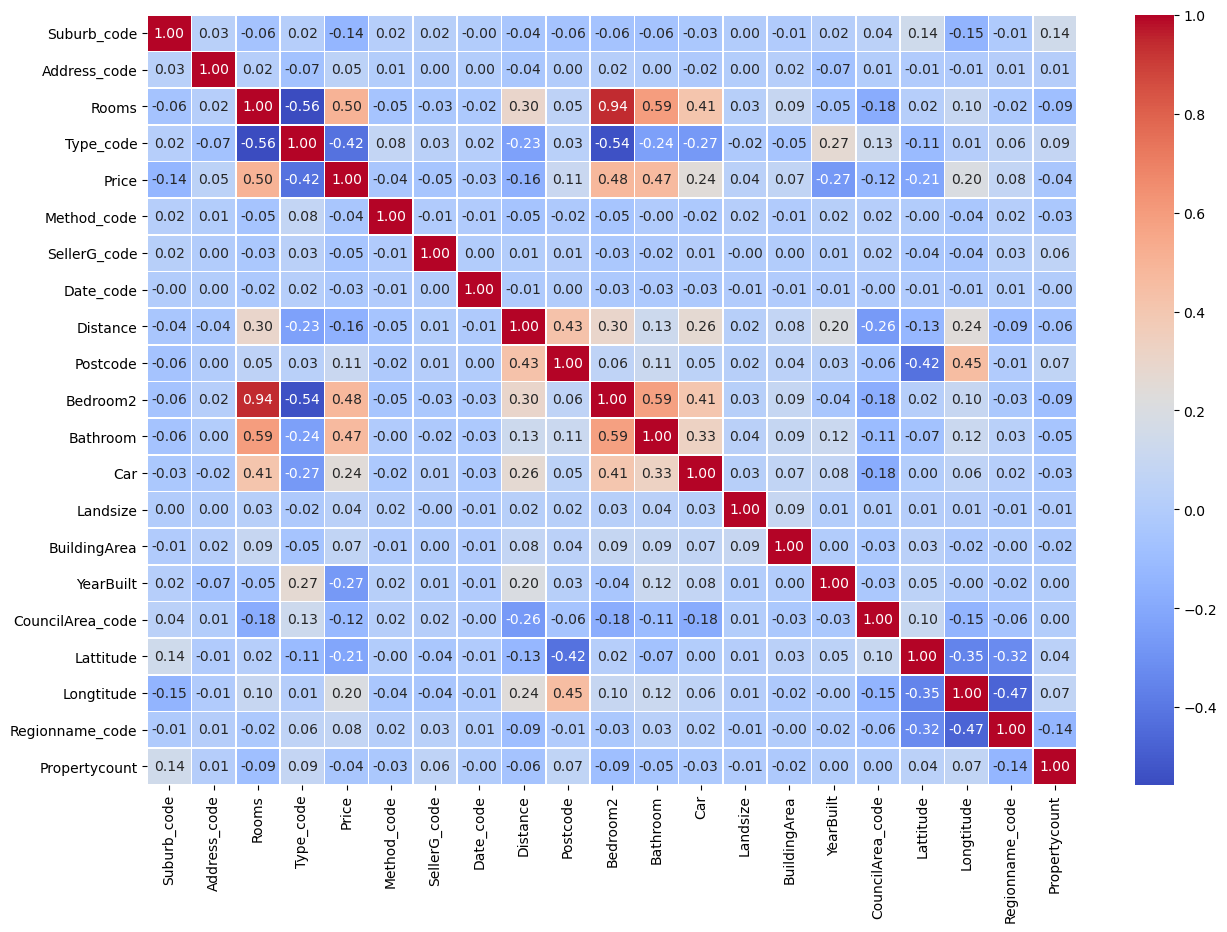

In [34]:
# Create a figure with the desired size
fig = plt.figure(figsize=(15,10))

# Plot the heatmap onto the figure
sns.heatmap(housing.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()


In [35]:
pd.DataFrame(housing.corr()['Price']).sort_values(by='Price',ascending=False)

,Price
Price,1.000000
Rooms,0.501910
Bedroom2,0.480373
Bathroom,0.469674
Car,0.242476
Longtitude,0.202038
Postcode,0.110421
Regionname_code,0.078642
BuildingArea,0.071469
Address_code,0.049932


In [36]:
housing.dtypes

Suburb              category
Suburb_code            int16
Address             category
Address_code           int16
Rooms                  int64
Type                category
Type_code               int8
Price                  int64
Method              category
Method_code             int8
SellerG             category
SellerG_code           int16
Date                category
Date_code               int8
Distance             float64
Postcode               int64
Bedroom2               int64
Bathroom               int64
Car                  float64
Landsize               int64
BuildingArea         float64
YearBuilt            float64
CouncilArea         category
CouncilArea_code        int8
Lattitude            float64
Longtitude           float64
Regionname          category
Regionname_code         int8
Propertycount          int64
dtype: object

In [37]:
#Selects all the integer and float columns from the input data and returns them as X.

def select_numerical_columns(data):
    
    X = data.select_dtypes(include=[np.int64, np.int16, np.int8, np.float64]).drop(['Price'], axis=1)
    return X

select_numerical_columns(housing)

,Suburb_code,Address_code,Rooms,Type_code,Method_code,SellerG_code,Date_code,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea_code,Lattitude,Longtitude,Regionname_code,Propertycount
0,0,12794,2,0,1,23,42,2.5,3067,2,1,1.0,202,126.0,1970.0,31,-37.79960,144.99840,2,4019
1,0,5943,2,0,1,23,47,2.5,3067,2,1,0.0,156,79.0,1900.0,31,-37.80790,144.99340,2,4019
2,0,9814,3,0,3,23,48,2.5,3067,3,2,0.0,134,150.0,1900.0,31,-37.80930,144.99440,2,4019
3,0,9004,3,0,0,23,48,2.5,3067,3,2,1.0,94,126.0,1970.0,31,-37.79690,144.99690,2,4019
4,0,10589,4,0,4,155,49,2.5,3067,3,1,2.0,120,142.0,2014.0,31,-37.80720,144.99410,2,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302,1991,4,0,1,16,33,16.7,3150,4,2,2.0,652,126.0,1981.0,-1,-37.90562,145.16761,4,7392
13576,305,12234,3,0,3,251,33,6.8,3016,3,2,2.0,333,133.0,1995.0,-1,-37.85927,144.87904,6,6380
13577,305,12745,3,0,1,194,33,6.8,3016,3,2,4.0,436,126.0,1997.0,-1,-37.85274,144.88738,6,6380
13578,305,13311,4,0,0,222,33,6.8,3016,4,1,5.0,866,157.0,1920.0,-1,-37.85908,144.89299,6,6380


In [219]:
housing

,Suburb,Suburb_code,Address,Address_code,Rooms,Type,Type_code,Price,Method,Method_code,...,Landsize,BuildingArea,YearBuilt,CouncilArea,CouncilArea_code,Lattitude,Longtitude,Regionname,Regionname_code,Propertycount
0,Abbotsford,0,85 Turner St,12794,2,h,0,1480000,S,1,...,202,126.0,1970.0,Yarra,31,-37.79960,144.99840,Northern Metropolitan,2,4019
1,Abbotsford,0,25 Bloomburg St,5943,2,h,0,1035000,S,1,...,156,79.0,1900.0,Yarra,31,-37.80790,144.99340,Northern Metropolitan,2,4019
2,Abbotsford,0,5 Charles St,9814,3,h,0,1465000,SP,3,...,134,150.0,1900.0,Yarra,31,-37.80930,144.99440,Northern Metropolitan,2,4019
3,Abbotsford,0,40 Federation La,9004,3,h,0,850000,PI,0,...,94,126.0,1970.0,Yarra,31,-37.79690,144.99690,Northern Metropolitan,2,4019
4,Abbotsford,0,55a Park St,10589,4,h,0,1600000,VB,4,...,120,142.0,2014.0,Yarra,31,-37.80720,144.99410,Northern Metropolitan,2,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,302,12 Strada Cr,1991,4,h,0,1245000,S,1,...,652,126.0,1981.0,Moreland,-1,-37.90562,145.16761,South-Eastern Metropolitan,4,7392
13576,Williamstown,305,77 Merrett Dr,12234,3,h,0,1031000,SP,3,...,333,133.0,1995.0,Moreland,-1,-37.85927,144.87904,Western Metropolitan,6,6380
13577,Williamstown,305,83 Power St,12745,3,h,0,1170000,S,1,...,436,126.0,1997.0,Moreland,-1,-37.85274,144.88738,Western Metropolitan,6,6380
13578,Williamstown,305,96 Verdon St,13311,4,h,0,2500000,PI,0,...,866,157.0,1920.0,Moreland,-1,-37.85908,144.89299,Western Metropolitan,6,6380


### State the Predictor and Target Variables.

In [38]:
X = select_numerical_columns(housing)
y_raw = housing['Price']

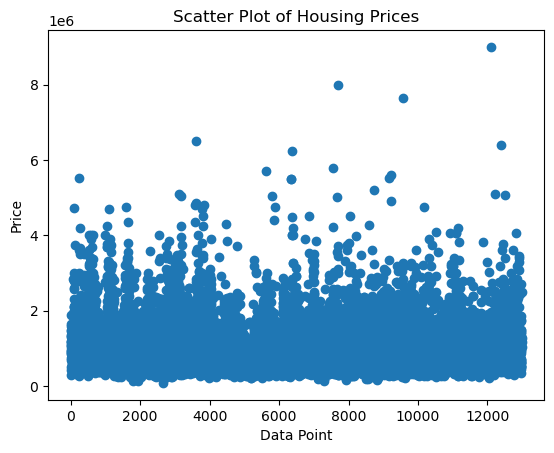

In [41]:
# Scatter plot of dependent variable (housing prices)

plt.scatter(range(len(housing['Price'])), housing['Price'])
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('Scatter Plot of Housing Prices')
plt.show()

Skewness = 2.259965318552404
kurtosis = 10.032553437303088


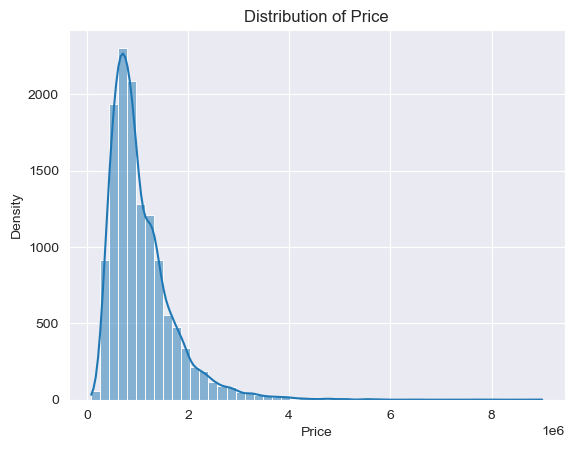

In [42]:
sns.set_style('darkgrid')

# Plot histogram with density curve
sns.histplot(y_raw, bins=50, kde=True)

print ('Skewness =', skew(y_raw))
print ('kurtosis =', kurtosis(y_raw))
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()


## Skewness
Skewness is the degree of distortion or deviation from the symmetrical normal distribution. Skewness can be seen as a measure to calculate the lack of symmetry in the data distribution.

Skewness helps you identify extreme values in one of the tails. Symmetrical distributions have a skewness of 0.

Distributions can be positively or negatively skewed.

`Positive Skewness`

A distribution is positively skewed when the tail on the right side of the distribution is longer (also often called "fatter"). When there is positive skewness, the mean and median are bigger than the mode.

`Negative Skewness`

Distributions are negatively skewed when the tail on the left side of the distribution is longer or fatter than the tail on the right side. When there is negative skewness, the mean and median are smaller than the mode.

Skewness can have implications for data analysis and the usage of certain models. The "normality assumption" seen before does not hold when data is skewed. When data is skewed, you'll need to transform the data first.

The dependent variable `Price` has a positive skewness.

This suggests that there are relatively few properties with very high prices, while most of the properties fall in a lower price range.

In [43]:
#Our Fisrt Model 

X = sm.add_constant(X)
model = sm.OLS(y_raw, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     923.6
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:06:09   Log-Likelihood:            -1.8630e+05
No. Observations:               12986   AIC:                         3.726e+05
Df Residuals:                   12965   BIC:                         3.728e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.999e+08   7.18e+06  

### We then change the predictor variables to compare the models

In [44]:
#Selects all the integer and float columns from the input data and returns them as X.

def select_numerical_columns(data):
    
    X_two = data.select_dtypes(include=[np.int64, np.float64]).drop(['Price'], axis=1)
    return X_two

select_numerical_columns(housing)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067,2,1,1.0,202,126.0,1970.0,-37.79960,144.99840,4019
1,2,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.80790,144.99340,4019
2,3,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.80930,144.99440,4019
3,3,2.5,3067,3,2,1.0,94,126.0,1970.0,-37.79690,144.99690,4019
4,4,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.80720,144.99410,4019
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,16.7,3150,4,2,2.0,652,126.0,1981.0,-37.90562,145.16761,7392
13576,3,6.8,3016,3,2,2.0,333,133.0,1995.0,-37.85927,144.87904,6380
13577,3,6.8,3016,3,2,4.0,436,126.0,1997.0,-37.85274,144.88738,6380
13578,4,6.8,3016,4,1,5.0,866,157.0,1920.0,-37.85908,144.89299,6380


In [45]:
X_two = select_numerical_columns(housing)
y_raw = housing['Price']

model_two = sm.OLS(y_raw, sm.add_constant(X_two)).fit()

print(model_two.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1199.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:11:58   Log-Likelihood:            -1.8721e+05
No. Observations:               12986   AIC:                         3.744e+05
Df Residuals:                   12973   BIC:                         3.745e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.518e+08   6.21e+06    -24.439

### Log Transformation of the Target Variable

In [46]:
y_log = np.log(y_raw)
y_log.name = "log(Price)"
y_log

0        14.207553
1        13.849912
2        14.197366
3        13.652992
4        14.285514
           ...    
13575    14.034646
13576    13.846040
13577    13.972514
13578    14.731801
13579    14.066269
Name: log(Price), Length: 12986, dtype: float64

Skewness = 0.19038649148926745
kurtosis = -0.0017764342563220126


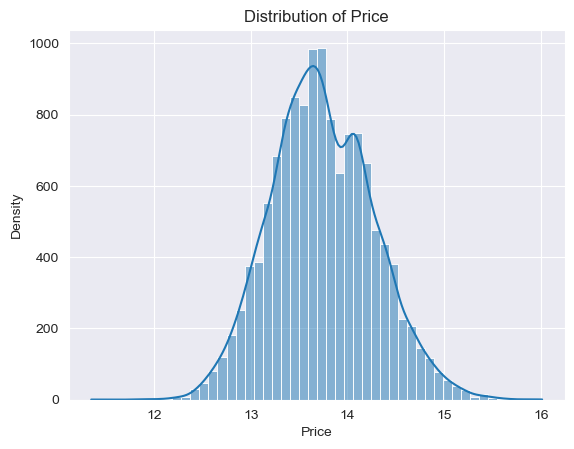

In [47]:
sns.set_style('darkgrid')

# Plot histogram with density curve
sns.histplot(y_log, bins=50, kde=True)

print ('Skewness =', skew(y_log))
print ('kurtosis =', kurtosis(y_log))
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

The log transformation has significantly reduced the skewness and kurtosis of the Price variable. 

A skewness value of 0.19 indicates that the distribution is approximately symmetric, while a kurtosis value of -0.001 indicates that the distribution is almost mesokurtic, i.e., it has a similar level of peakedness compared to a normal distribution.

`The log transformation has transformed the data to a more suitable form for statistical analysis.`

In [48]:
X = sm.add_constant(X)
model = sm.OLS(y_log, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1577.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:11   Log-Likelihood:                -2149.1
No. Observations:               12986   AIC:                             4340.
Df Residuals:                   12965   BIC:                             4497.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -191.6163      4.985  

In [49]:
X_two = sm.add_constant(X_two)
model_two = sm.OLS(y_log, X_two).fit()

print(model_two.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1631.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:32   Log-Likelihood:                -4185.1
No. Observations:               12986   AIC:                             8396.
Df Residuals:                   12973   BIC:                             8493.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -151.6339      4.703    -32.241

Thus for small coefficients, the conventional way to interpret a log-transformed target is this:

For each increase of 1 unit in `feature`, we see an associated change of `coefficient * 100%` in `target`

## Shifting to Improve Intercept Interpretability

In [50]:
X_two.describe()

,const,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,12986.0,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000
mean,1.0,2.923841,9.994948,3104.457647,2.899507,1.531341,1.593764,554.364777,140.261231,1966.652472,-37.809058,144.993928,7449.134992
std,0.0,0.960108,5.762080,89.932210,0.970328,0.692428,0.956166,4078.830382,401.076674,29.724830,0.077854,0.102342,4369.573994
min,1.0,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,1.0,2.000000,6.100000,3044.000000,2.000000,1.000000,1.000000,169.000000,120.000000,1960.000000,-37.856200,144.929115,4380.000000
50%,1.0,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,420.000000,126.000000,1970.000000,-37.802200,144.999200,6543.000000
75%,1.0,3.000000,12.900000,3147.000000,3.000000,2.000000,2.000000,650.000000,132.000000,1975.000000,-37.757000,145.055900,10331.000000
max,1.0,10.000000,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [51]:
X_centered = X_two.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,const,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,12986.0,12986.000000,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04
mean,0.0,0.000000,-1.400731e-16,9.749088e-14,2.013551e-16,-1.313185e-17,2.013551e-16,2.689404e-14,-4.482340e-15,1.344702e-14,1.245885e-15,1.244681e-14,-1.703289e-13
std,0.0,0.960108,5.762080e+00,8.993221e+01,9.703283e-01,6.924281e-01,9.561658e-01,4.078830e+03,4.010767e+02,2.972483e+01,7.785439e-02,1.023424e-01,4.369574e+03
min,0.0,-1.923841,-9.994948e+00,-1.044576e+02,-2.899507e+00,-1.531341e+00,-1.593764e+00,-5.543648e+02,-1.402612e+02,-7.706525e+02,-3.734924e-01,-5.621178e-01,-7.200135e+03
25%,0.0,-0.923841,-3.894948e+00,-6.045765e+01,-8.995072e-01,-5.313414e-01,-5.937645e-01,-3.853648e+02,-2.026123e+01,-6.652472e+00,-4.714240e-02,-6.481278e-02,-3.069135e+03
50%,0.0,0.076159,-7.949484e-01,-2.045765e+01,1.004928e-01,-5.313414e-01,4.062355e-01,-1.343648e+02,-1.426123e+01,3.347528e+00,6.857599e-03,5.272222e-03,-9.061350e+02
75%,0.0,0.076159,2.905052e+00,4.254235e+01,1.004928e-01,4.686586e-01,4.062355e-01,9.563522e+01,-8.261231e+00,8.347528e+00,5.205760e-02,6.197222e-02,2.881865e+03
max,0.0,7.076159,3.810505e+01,8.725424e+02,1.710049e+01,6.468659e+00,8.406236e+00,4.324596e+05,4.437474e+04,5.134753e+01,4.005276e-01,5.324222e-01,1.420087e+04


In [52]:
centered_model = sm.OLS(y_raw, sm.add_constant(X_centered)).fit()
print(centered_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1199.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:16:18   Log-Likelihood:            -1.8721e+05
No. Observations:               12986   AIC:                         3.744e+05
Df Residuals:                   12973   BIC:                         3.745e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.071e+06   3873.718    276.358

In our zero-centered model, the intercept interpretation is this:

For a real estate with the average number of rooms etc, we would expect a price of about $1071000 (1M)

That makes a lot more sense! Now the intercept is something that might be worth reporting to stakeholders.

In [53]:
centered_model_2 = sm.OLS(y_log, sm.add_constant(X_centered)).fit()
print(centered_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1631.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:16:35   Log-Likelihood:                -4185.1
No. Observations:               12986   AIC:                             8396.
Df Residuals:                   12973   BIC:                             8493.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.7391      0.003   4685.455

In [54]:
abs(X.corr()) > 0.75

,const,Suburb_code,Address_code,Rooms,Type_code,Method_code,SellerG_code,Date_code,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea_code,Lattitude,Longtitude,Regionname_code,Propertycount
const,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Suburb_code,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Address_code,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rooms,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Type_code,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Method_code,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SellerG_code,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Date_code,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Distance,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Postcode,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [56]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(Rooms, Bedroom2)",0.942178


In [57]:
def get_top_correlated_columns(dataframe, target_column, num_cols=5):
    corr_matrix = dataframe.corr()
    corr_with_target = corr_matrix[target_column].abs()
    sorted_corr = corr_with_target.sort_values(ascending=False)
    top_cols = sorted_corr[1:num_cols+1].index.tolist()
    return top_cols

get_top_correlated_columns(housing, 'Price', num_cols=5)


['Rooms', 'Bedroom2', 'Bathroom', 'Type_code', 'YearBuilt']

In [58]:
X_three = housing[['Bedroom2', 'Bathroom', 'Car','Type_code', 'YearBuilt']]

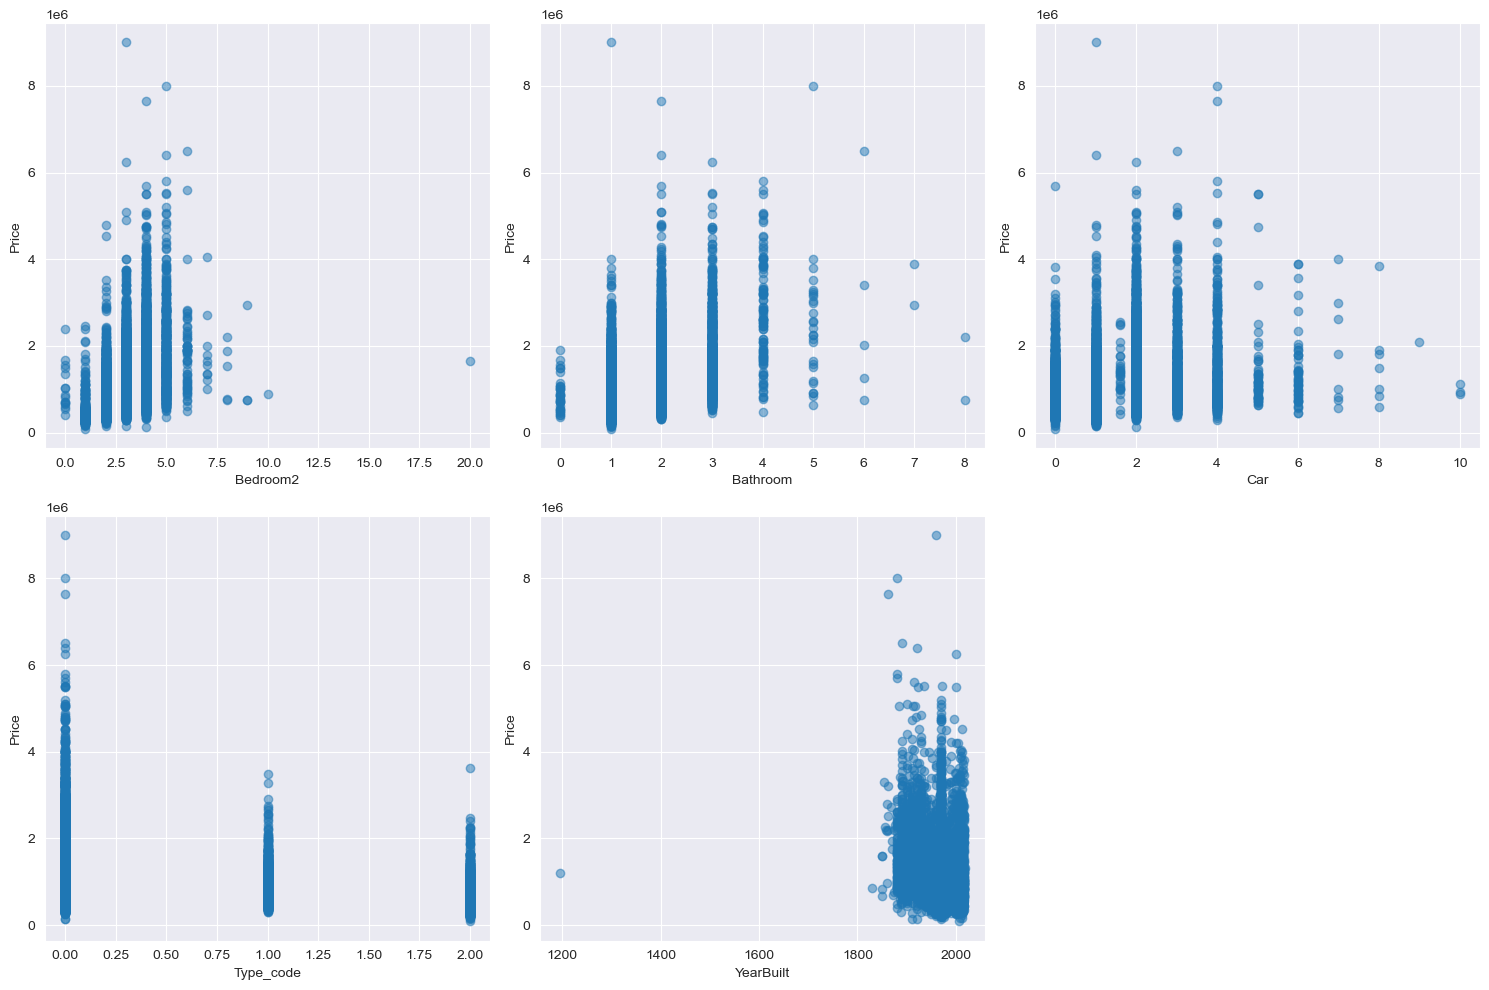

In [66]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Scatter plots
axs[0, 0].scatter(housing['Bedroom2'], housing['Price'], alpha=0.5)
axs[0, 0].set_xlabel('Bedroom2')
axs[0, 0].set_ylabel('Price')

axs[0, 1].scatter(housing['Bathroom'], housing['Price'], alpha=0.5)
axs[0, 1].set_xlabel('Bathroom')
axs[0, 1].set_ylabel('Price')

axs[0, 2].scatter(housing['Car'], housing['Price'], alpha=0.5)
axs[0, 2].set_xlabel('Car')
axs[0, 2].set_ylabel('Price')

axs[1, 0].scatter(housing['Type_code'], housing['Price'], alpha=0.5)
axs[1, 0].set_xlabel('Type_code')
axs[1, 0].set_ylabel('Price')

axs[1, 1].scatter(housing['YearBuilt'], housing['Price'], alpha=0.5)
axs[1, 1].set_xlabel('YearBuilt')
axs[1, 1].set_ylabel('Price')

# Remove empty subplot
fig.delaxes(axs[1, 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [83]:
model_three = sm.OLS(y_raw, sm.add_constant(X_three)).fit()
print(model_three.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     1671.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:59:59   Log-Likelihood:            -1.8883e+05
No. Observations:               12986   AIC:                         3.777e+05
Df Residuals:                   12980   BIC:                         3.777e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.117e+07   3.06e+05     36.520      0.0

In [84]:
model_four = sm.OLS(y_log, sm.add_constant(X_three)).fit()
print(model_four.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     2325.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:00:54   Log-Likelihood:                -6004.3
No. Observations:               12986   AIC:                         1.202e+04
Df Residuals:                   12980   BIC:                         1.207e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6676      0.235     92.115      0.0

In [85]:
X_three.describe()

,Bedroom2,Bathroom,Car,Type_code,YearBuilt
count,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000
mean,2.899507,1.531341,1.593764,0.545357,1966.652472
std,0.970328,0.692428,0.956166,0.842269,29.724830
min,0.000000,0.000000,0.000000,0.000000,1196.000000
25%,2.000000,1.000000,1.000000,0.000000,1960.000000
50%,3.000000,1.000000,2.000000,0.000000,1970.000000
75%,3.000000,2.000000,2.000000,1.000000,1975.000000
max,20.000000,8.000000,10.000000,2.000000,2018.000000


In [86]:
X_centered_two = X_three.copy()

for col in X_centered_two.columns:
    X_centered_two[col] = X_centered_two[col] - X_centered_two[col].mean()
    
X_centered_two.describe()

,Bedroom2,Bathroom,Car,Type_code,YearBuilt
count,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04,1.298600e+04
mean,2.013551e-16,-1.313185e-17,2.013551e-16,-6.565927e-17,1.344702e-14
std,9.703283e-01,6.924281e-01,9.561658e-01,8.422692e-01,2.972483e+01
min,-2.899507e+00,-1.531341e+00,-1.593764e+00,-5.453565e-01,-7.706525e+02
25%,-8.995072e-01,-5.313414e-01,-5.937645e-01,-5.453565e-01,-6.652472e+00
50%,1.004928e-01,-5.313414e-01,4.062355e-01,-5.453565e-01,3.347528e+00
75%,1.004928e-01,4.686586e-01,4.062355e-01,4.546435e-01,8.347528e+00
max,1.710049e+01,6.468659e+00,8.406236e+00,1.454643e+00,5.134753e+01


In [89]:
model_five = sm.OLS(y_log, sm.add_constant(X_centered_two)).fit()
print(model_five.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     2325.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:04:58   Log-Likelihood:                -6004.3
No. Observations:               12986   AIC:                         1.202e+04
Df Residuals:                   12980   BIC:                         1.207e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7391      0.003   4074.070      0.0